#### Lab 10
## Conditioning and Stability

### Problem 1.
#### Compute condition number of a matrix via SVD decomposotion.

In [3]:
import scipy.linalg as la
import numpy as np
import sympy as sy

import matplotlib.pyplot as plt

In [4]:
def condition(A):
    _, sings, _ = la.svd(A)
    
    K = sings[0] / sings[-1]
    return K

In [5]:
rand_mat = np.random.random((5, 5))
np.allclose(np.linalg.cond(rand_mat), condition(rand_mat))

True

In [6]:
Q, R = la.qr(rand_mat)
condition(Q)

1.0000000000000007

### Problem 2.
#### perturb ploynomials

In [7]:
def perturb_wilk():
    
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    org = np.poly1d(w_coeffs)
    org_1 = org(1)
    roots = np.roots(org)
    
    fig, ax = plt.subplots( figsize=(12,8))
    
    k_hat = np.empty(100)
    k = np.empty(100)
    for i in range(100):
        error = np.random.normal(loc=0.0, scale=1e-10, size=len(w_coeffs))
        new_coeffs = w_coeffs + error

        # make a polynomial and find the roots
        pert = np.poly1d(new_coeffs)
        new_roots = np.roots(pert)
        k[i] = la.norm(new_roots - roots, np.inf) / la.norm(error, np.inf)
        k_hat[i] = k[i] * la.norm(w_coeffs, np.inf) / la.norm(roots, np.inf)
        
        if i == 0:
            ax.plot(new_roots.real, new_roots.imag, 'k,', label='perturbed')
        else:
            ax.plot(new_roots.real, new_roots.imag, 'k,')
        
    ax.plot(roots.real, roots.imag, 'bo', markersize=7, label='original')
    plt.legend()
    plt.show()
    
    return k.mean() , k_hat.mean() 

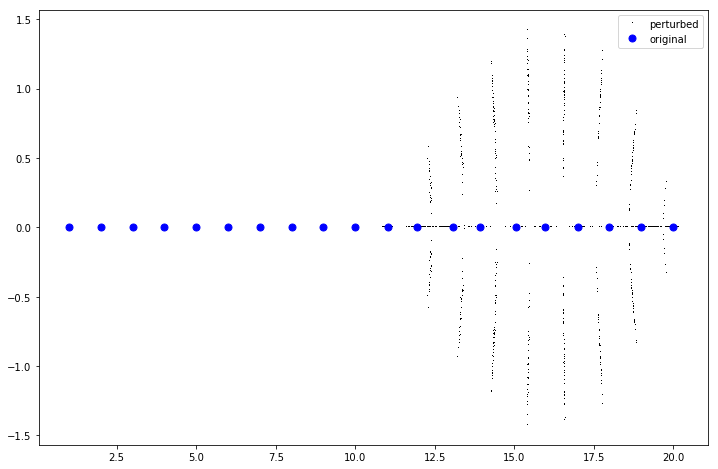

relative: 3.2126659184e+27 and absolute conditipning number: 4654735346.08


In [9]:
k, k_hat = perturb_wilk()
print('relative:',k_hat, 'and absolute conditipning number:', k )

### Problem 3.
#### Condition Number based on eignvalues

In [17]:
def matrix_cond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    HA = A + H
    lamb = la.eigvals(A)
    lamb_tild = la.eigvals(HA)
    
    kappa = la.norm(lamb - lamb_tild) / la.norm(H)
    kappa_hat = kappa * la.norm(A) / la.norm(lamb)
    
    return  kappa, kappa_hat
    

In [18]:
A = np.random.random((5, 5))
absol, relat = matrix_cond(A) 

In [19]:
absol, relat

(1652136813.8369989, 1811065698.6517866)

### Probem 4.
#### Conditioning number of an eigenvalue problem

In [34]:
def eig_cond(res, params):
    x_min, x_max, y_min, y_max = params
    
    xvals = np.linspace(x_min, x_max, num=res)
    yvals = np.linspace(y_min, y_max, num=res)
    
    color_map = np.zeros((res, res)) 
    mat = np.diag([1, 1])
    for i in range(res):
        for j in range(res):

            mat[1, 0] = yvals[i]
            mat[0, 1] = xvals[j]
            
            _, rel = matrix_cond(mat)
            
            color_map[i,j] = rel
    
    plt.pcolormesh(xvals, yvals, color_map, cmap='gray_r' )
    plt.colorbar()
    plt.show()    

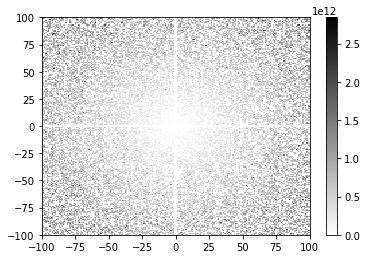

In [35]:
params = (-100, 100, -100, 100)
eig_cond(200, params)

### Problem 5.
#### comparing stability of least squares when fitting a poliynomial

In [59]:
def compare_ols(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    
    AA = A.T @ A
    Ab = A.T @ yk
    x_inv = la.inv(AA) @ Ab
    poly_inv = np.polyval(x_inv, xk)
    
    Q, R = la.qr(AA)
    x_qr = la.solve_triangular(R, Q.T @ Ab)
    poly_qr = np.polyval(x_qr, xk)
    
    plt.plot(xk, poly_inv, label='Solving via norma inverse')
    plt.plot(xk, poly_qr, label='QR Solver')
    plt.plot(xk, yk, 'k*', markersize=2)
    plt.legend()
    plt.show()

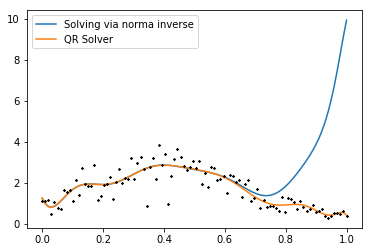

In [61]:
compare_ols(12)

### Problem 6.

In [69]:
from sympy import integrate, exp

In [145]:
def forward_error_integral():
    x = sy.symbols('x')
    ns = np.arange(5, 50, 5,)
    rfe = np.zeros(len(ns))
    for i in range(len(ns)):
        n = int(ns[i])
        In = sy.integrate(x ** n*exp(x-1),(x, 0, 1))
        
        If = ((-1) ** n * sy.subfactorial(n) + (-1) ** (n+1) *
             (sy.factorial(n)/np.exp(1)))    
              
        rfe[i] = np.abs(float(In) - If) / np.abs(float(In))
        
    plt.semilogy(rfe)
    plt.show()

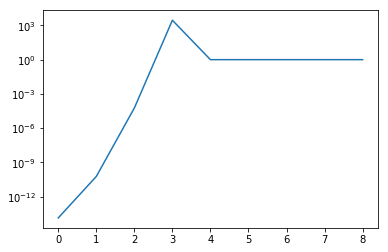

In [146]:
forward_error_integral()

In [142]:
((-1) ** 5 * sy.subfactorial(5) + (-1) ** (5+1) * (sy.factorial(5) / np.exp(1))) 

0.145532940573077